## Contourf subplots and colormap normalization

Today we are going to learn some tricks about plotting two dimensional data with matplotlib contourf function.

In [1]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

Let us start with creating two sample 2D arrays, Z1 and Z2.

In [2]:
# Array 1
delta1 = 0.025
x1 = np.arange(-3.0, 3.0, delta1)
y1 = np.arange(-2.0, 2.0, delta1)
X1, Y1 = np.meshgrid(x1, y1)
Z1_1 = mlab.bivariate_normal(X1, Y1, 1.0, 1.0, 0.0, 0.0)
Z2_1 = mlab.bivariate_normal(X1, Y1, 1.5, 0.5, 1, 1)
Z1 = 10.0 * (Z2_1 - Z1_1)
# Array 2
delta2 = 0.05
x2 = np.arange(-6.0, 6.0, delta2)
y2 = np.arange(-4.0, 4.0, delta2)
X2, Y2 = np.meshgrid(x2, y2)
Z1_2 = mlab.bivariate_normal(X2, Y2, 1.0, 1.0, 0.0, 0.0)
Z2_2 = mlab.bivariate_normal(X2, Y2, 1.5, 0.5, 1, 1)
Z2 = 30.0 * (Z2_2 - Z1_2)

print(Z1.shape, Z2.shape)

(160, 240) (160, 240)


And now straight to plotting!

Step 0. Plot Z1, Z2 and the difference between them on the three subplots using contourf().

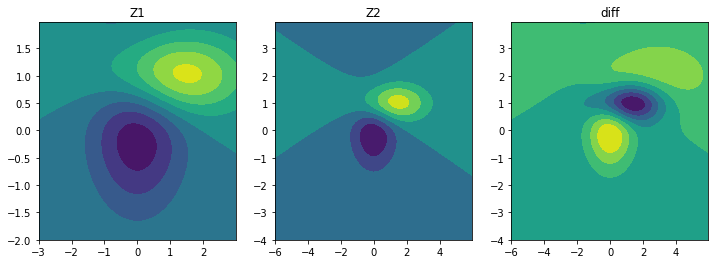

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
ax[0].contourf(X1, Y1, Z1)
ax[1].contourf(X2, Y2, Z2)
ax[2].contourf(X2, Y2, Z1 - Z2)
ax[0].set_title('Z1')
ax[1].set_title('Z2')
ax[2].set_title('diff')
plt.ioff()

Step 1. Add a colorbar to each of the subplots in order to be able to interpret the data. Alternatively we could have chosen to use contour() to add contours on top of filled contours, but not today.

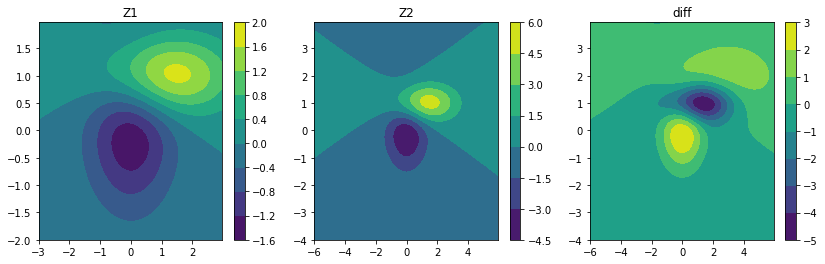

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))
p1 = ax[0].contourf(X1, Y1, Z1)
p2 = ax[1].contourf(X2, Y2, Z2)
p3 = ax[2].contourf(X2, Y2, Z1 - Z2)

fig.colorbar(p1, ax=ax[0])
fig.colorbar(p2, ax=ax[1])
fig.colorbar(p3, ax=ax[2])

ax[0].set_title('Z1')
ax[1].set_title('Z2')
ax[2].set_title('diff')
plt.ioff()

> Why did we call fig.colobar(...), not ax.colorbar(...)? The reason is that creation of a colorbar requires addition of a new axis to the figure. Think about the following for a moment:
> * By writing ax[0].contourf(..., Z1) you say 'display Z1 using contourf() method of axis [0] on axis [0]'. In other words, you use axis method to reserve axis [0] for displaying Z1, and unless you want to overlay Z1 with some other array, you can't use axis [0] for anything else.
> * Colorbar is exactly 'something else', something extra, that needs to be shown on an additional axis, and in order to create such an axis we use a figure method, fig.colorbar().

> Why fig.colorbar(p1, ...), not fig.colorbar(...)? The reason is that we need to pass an object to the fig.colorbar(), which we want to show the colorbar for. To have a colorbar for one subplot we need to do two things:
> 1. Create the required object (known as mappable in Python terminology) by assigning the output from contourf() to a variable, e.g. p1.
> 2. Pass the object to fig.colorbar().

Step 2. If Z1 and Z2 describe the same variable, it is logical to have the same colorbar for the first two subplots.

> **Tip**. If you want to have **one colorbar for two or more contour plots**, then you need to not only control the colorbar, but also control the levels in these contour plots. That is, to compare the same levels between the plots, the plots should have the same contour levels. One way of doing this is to calculate the levels ahead of time.

Let us create an array of equally spaced values (or levels) that encompasses minima and maxima from both datasets and pass this array to levels keyword of contourf().

In [5]:
print(Z1.min(), Z1.max(), Z2.min(), Z2.max())

-1.46827741286 1.69963862662 -4.40377258296 5.09891587987


In [6]:
Z_range = np.arange( round(min(Z1.min(), Z2.min()))-1, round(max(Z1.max(), Z2.max()))+2, 1)
Z_range

array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.])

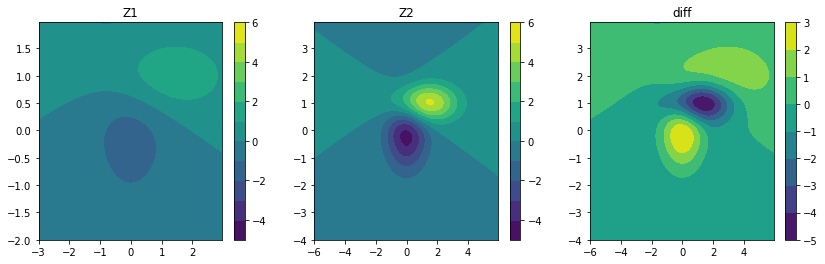

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))
p1 = ax[0].contourf(X1, Y1, Z1, levels=Z_range)
p2 = ax[1].contourf(X2, Y2, Z2, levels=Z_range)
p3 = ax[2].contourf(X2, Y2, Z1 - Z2)

fig.colorbar(p1, ax=ax[0])
fig.colorbar(p2, ax=ax[1])
fig.colorbar(p3, ax=ax[2])

ax[0].set_title('Z1')
ax[1].set_title('Z2')
ax[2].set_title('diff')
plt.ioff()

Note that it has become much easier to see that the gradients on the first subplot are much smaller than on the second one. At the same time, though, having a colorbar for each of the two subplots has become redundant.

Step 3. Create a common colorbar for the first two suplots.

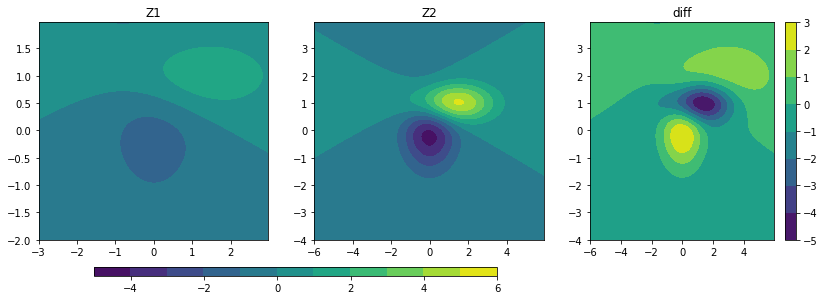

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))
p1 = ax[0].contourf(X1, Y1, Z1, levels=Z_range)
p2 = ax[1].contourf(X2, Y2, Z2, levels=Z_range)
p3 = ax[2].contourf(X2, Y2, Z1 - Z2)

fig.colorbar(p3, ax=ax[2])

cax = fig.add_axes([0.18, 0., 0.4, 0.03])
fig.colorbar(p1, cax=cax, orientation='horizontal')

ax[0].set_title('Z1')
ax[1].set_title('Z2')
ax[2].set_title('diff')
plt.ioff()

Step 4. Use a diverging colormap for plotting the difference between arrays.

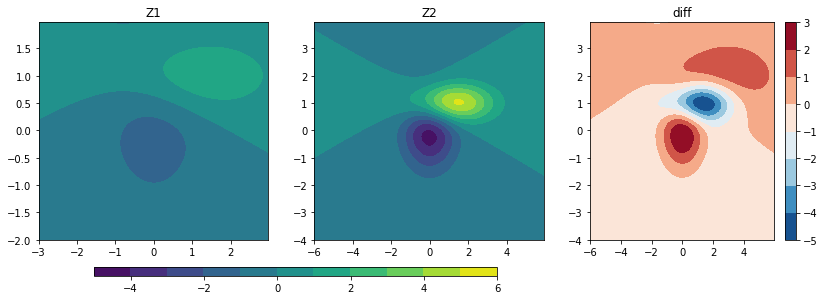

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))
p1 = ax[0].contourf(X1, Y1, Z1, levels=Z_range)
p2 = ax[1].contourf(X2, Y2, Z2, levels=Z_range)
p3 = ax[2].contourf(X2, Y2, Z1 - Z2, cmap='RdBu_r')

fig.colorbar(p3, ax=ax[2])

cax = fig.add_axes([0.18, 0., 0.4, 0.03])
fig.colorbar(p1, cax=cax, orientation='horizontal')

ax[0].set_title('Z1')
ax[1].set_title('Z2')
ax[2].set_title('diff')
plt.ioff()

> **Tip**. If the **range of your data is non-symmetrical around zero**, but you want to **set the middle point of a colormap to zero**, you could try to **normalize** your **colormap**.

Step 5. Introduce MidpointNormalize class that would scale data values to colors and add the capability to specify the middle point of a colormap. Use norm keyword of contourf().

In [10]:
import matplotlib.colors as colors

In [11]:
class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

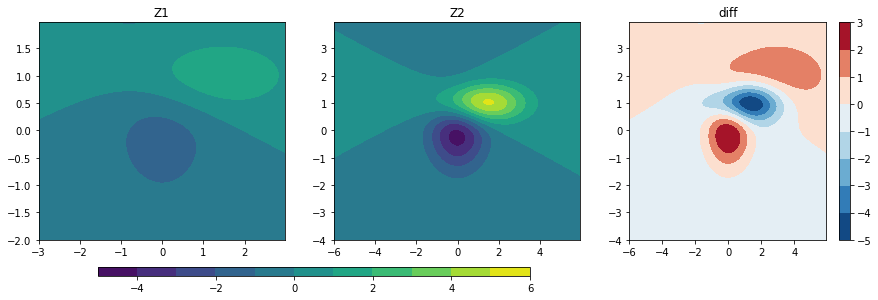

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
p1 = ax[0].contourf(X1, Y1, Z1, levels=Z_range)
p2 = ax[1].contourf(X2, Y2, Z2, levels=Z_range)
p3 = ax[2].contourf(X2, Y2, Z1 - Z2, norm=MidpointNormalize(midpoint=0.), cmap='RdBu_r')

fig.colorbar(p3, ax=ax[2])

cax = fig.add_axes([0.18, 0., 0.4, 0.03])
fig.colorbar(p1, cax=cax, orientation='horizontal')

ax[0].set_title('Z1')
ax[1].set_title('Z2')
ax[2].set_title('diff')
plt.ioff()

## References:
* Anatomy of matplotlib | SciPy 2015 Tutorial | Benjamin Root and Joe Kington (https://www.youtube.com/watch?v=MKucn8NtVeI)
* https://stackoverflow.com/questions/26065811/same-color-bar-range-for-different-plots-matplotlib?answertab=active#tab-top
* https://matplotlib.org/users/colormapnorms.html
* https://stackoverflow.com/questions/7404116/defining-the-midpoint-of-a-colormap-in-matplotlib/7746125#7746125